In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt

Data = ["qap10", "qap15", "nug08-3rd", "nug20"]
method = ["PDHG/", "EGM/", "ADMM/"]
cachepath = "cache/"
cachesuffix = ".txt"
datapath = "data/"
datasuffix = ".mps"

In [84]:
def plot_gap(gap, record_every, plt_handle, marker,
             color,label,restart_length,idx=None):
    plt_handle.plot(
        np.arange(0, len(gap) * record_every, record_every),
        gap,
        linewidth=0.8,
        color=color,
        label=label
    )
    if idx is not None:
        plt_handle.scatter(
            np.arange(0, len(gap) * record_every, record_every)[idx//30-1],
            gap[idx//30-1],
            marker=marker,
            s=12,
            color=color
        )
    if restart_length !=-1:
        # fixed_restart_idx=np.arange(0, len(gap) * record_every, record_every)[restart_length]
        # plt_handle.scatter(
        #     np.arange(0, len(gap) * record_every, record_every)[restart_length],
        #     gap[restart_length],
        #     marker=marker,
        #     color=color,
        # )
        pass
        
    plt_handle.set_xlabel("iteration")
    plt_handle.set_ylabel("normalized duality gap")
    plt_handle.set_yscale("log")

    return

['nug08-3rd_adaptive_restarts.txt', 'nug08-3rd_fixed_restarts_1024.txt', 'nug08-3rd_fixed_restarts_256.txt', 'nug08-3rd_fixed_restarts_64.txt', 'nug08-3rd_no_restarts.txt']
[  30  120 1020 1950 2340 2400 2490 2550 2640 3330 3450]


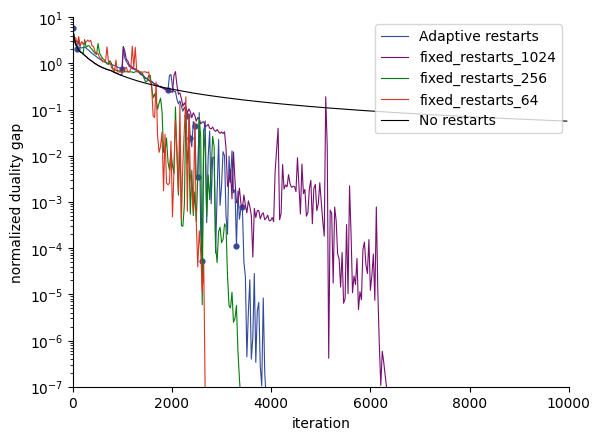

In [87]:
files = [f for f in os.listdir(cachepath+method[0]) if not f.endswith("idx.txt")]
idxfile = [f for f in os.listdir(cachepath+method[0]) if f.endswith("idx.txt")][0]
adaptive_restart_idx=np.loadtxt(cachepath+method[0]+idxfile,dtype=int)


%matplotlib inline
fig, ax = plt.subplots()
ax.set_xlim(0,10000)
ax.set_ylim(1e-7,1e1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

marker = ['o','v','^','<',None]
color = ["#324a9d","#780f70",'#057f0c','#db3421','black']
fixed_length = [-1,1024,256,64,-1] 
labels = ["Adaptive restarts",
           "fixed_restarts_1024",
           "fixed_restarts_256",
           "fixed_restarts_64",
           "No restarts"]

for i,filename in enumerate(files):
    filepath = os.path.join(cachepath+method[0], filename)
    cache = np.loadtxt(filepath,delimiter=',')
    gap = np.abs(cache[:,0])
    kkt_error = cache[:,1]
    if i==0:
        plot_gap(gap,30,ax,marker[i],color[i],labels[i],-1,adaptive_restart_idx)
    else:
        plot_gap(gap,30,ax,marker[i],color[i],labels[i],fixed_length[i])

ax.legend(loc='upper right')

print(files)
print(adaptive_restart_idx)